classwork:https://colab.research.google.com/drive/1zqrBPbZIhv4eBKB05jXO7XscHbS_E5jM#scrollTo=LDNX7WXRqZ_E

Рассмотрим граф  G=(V,E) , вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

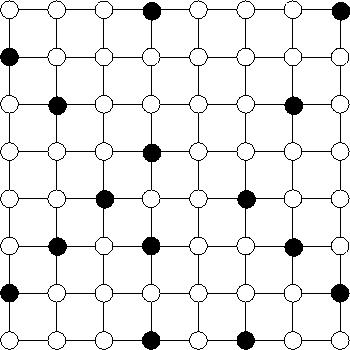

In [5]:
from IPython.display import Image
Image(filename="img/table.jpg", width = 400, height = 400)

*Труднокопируемый текст* из условия

1. Оценить  En(ξ)  с помощью МСМС для графа 8х8
2. Обосновать численно и графически стационарность
3. Построить график распределеиня  n(ξ)

In [6]:
import matplotlib.pyplot as plt
import numpy as np


#фнукция раскраски графа

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()
    


Проверяем функцию на работоспособность.

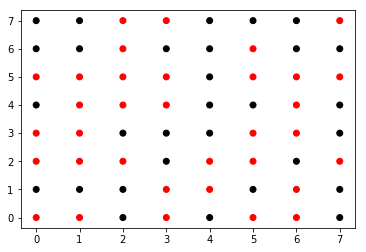

In [18]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size))

plot_grid(narr.astype('bool'))

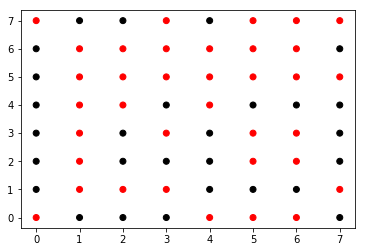

In [19]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size))

plot_grid(narr.astype('bool'))

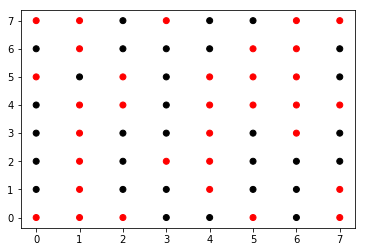

In [20]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size))

plot_grid(narr.astype('bool'))

Функция Metropolis sampling:

In [11]:
def metroplis(start, value, proposal, niter, nburn=0):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [value(current)]
    for i in range(niter):
        proposed = proposal(current)
        p = value(proposed) / (value(current)+1e-5)
        if np.random.rand() < p:
            current = proposed
        post.append(value(current))
    return post[nburn:]

Начинаем решать:

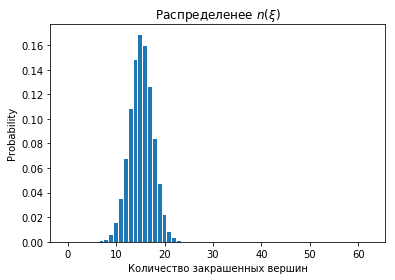

In [15]:
value = lambda x: x.sum()
#Считаем число закрашенных вершин
# Соседями считаем графы отличающиеся в одной точке
def proposal(X):##Выбераем граф для следующего шага из соседей
    s,_ = X.shape
    k = True
    while k:
        pos = np.random.choice(np.arange(0,s), size=2)
    #Выбераем положение в которой может отличатся сосед
        if X[pos[0]][pos[1]] == 1:
            X[pos[0]][pos[1]] = 0
            k = False
        else:
            if X[min(pos[0]+1,s-1)][pos[1]]+X[max(pos[0]-1,0)][pos[1]]+X[pos[0]][min(pos[1]+1,s-1)]+X[pos[0]][max(pos[1]-1,0)] == 0:
                X[pos[0]][pos[1]] = 1
                k = False
    return X



post = metroplis(np.zeros((8,8)), value, proposal, 100000)


Probability,_,_ = plt.hist(post,bins=np.arange(0,64)-0.5 ,rwidth=0.8, density=True)
plt.xlabel('Количество закрашенных вершин')
plt.ylabel('Probability')
plt.title(r'Распределение $n(\xi)$')
plt.show()

In [17]:
import random
Probability =  np.array(Probability)
niter = 10000
num = list(np.arange(0,63))
len(num)
S = 0.0
for i in range(niter):
    S += int(random.choices(num, weights =  Probability)[0])
S /=niter
print(f'Среднее значение закрашенных вершин графа: {S}')

Среднее значение закрашенных вершин графа: 15.1762


Cлед. проверка:
Разобьем выборку на 2 куска: конечный и начальный Xs и Xl и вычисляем статичтику t-критерия Стьюдента

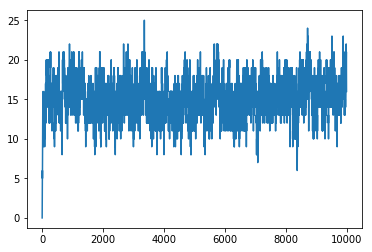

Ttest_indResult(statistic=-0.6467256708176159, pvalue=0.5179225463175391)

In [24]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

post = metroplis(np.zeros((8,8)), value, proposal, 10000)
plt.plot(post)
plt.show()

g_test(post)

Посмотрим с какого-то момента

In [25]:
g_test(post[1000:]) 

Ttest_indResult(statistic=-2.0998790432285968, pvalue=0.03593219784855308)